In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML
import seaborn as sns
from mountain_car import MountainCar


C:\Users\vishn\AppData\Local\Temp\ipykernel_27852\3001818875.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
class MountainCarVisualizer(MountainCar):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.fig = None
        self.ax = None
        self.car = None
        self.time_text = None
        plt.style.use('dark_background')
    
    def calculate_value_function(self):
        """Calculate the state-value function for the current policy."""
        vel_vec, pos_vec = self.get_vel_pos_plot_vecs()
        value_function = np.zeros((len(vel_vec), len(pos_vec)))
        
        for i, vel in enumerate(vel_vec):
            for j, pos in enumerate(pos_vec):
                # Calculate -max Q(s,a) to match the visualization in the image
                value_function[i, j] = -max(self.q(vel, pos, a) for a in self.actions)
        
        return vel_vec, pos_vec, value_function
    
    def plot_value_function_with_trajectory(self, episode_num=-1, figsize=(15, 6)):
        """Plot the value function with trajectory overlay in the style shown."""
        vel_vec, pos_vec, value_function = self.calculate_value_function()
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, 
                                      gridspec_kw={'width_ratios': [2, 1]})
        
        # Left subplot: Value function and trajectory
        # Normalize and clip the value function for visualization
        norm_value = (value_function - value_function.min()) / (value_function.max() - value_function.min())
        
        # Create heatmap with custom colormap
        cmap = plt.cm.YlOrRd_r
        im = ax1.imshow(norm_value, extent=[self.pos_min_max[0], self.pos_min_max[1],
                                          self.vel_min_max[0], self.vel_min_max[1]],
                       aspect='auto', origin='lower', cmap=cmap)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax1)
        cbar.set_label('Value', color='white')
        
        # Plot trajectory if episode data exists
        if self.results is not None:
            if episode_num == -1:
                episode_num = self.results['episode'].max()
            episode_data = self.results[self.results['episode'] == episode_num]
            ax1.plot(episode_data['pos'], episode_data['vel'], 
                    color='white', linewidth=2, alpha=0.8)
        
        # Configure left subplot
        ax1.set_xlabel('position, x')
        ax1.set_ylabel('velocity, ẋ')
        ax1.set_title(f'The Mountain Car Task\n-max q(s, a, w)\nEpisode = {episode_num}')
        
        # Right subplot: Mountain shape
        x = np.linspace(self.pos_min_max[0], self.pos_min_max[1], 100)
        y = np.sin(3 * x) * 0.45 + 0.55
        
        # Plot mountain
        ax2.plot(x, y, 'coral', linewidth=2)
        
        # Add car position if we have episode data
        if self.results is not None:
            final_pos = episode_data['pos'].iloc[-1]
            final_height = np.sin(3 * final_pos) * 0.45 + 0.55
            ax2.plot(final_pos, final_height, 'o', color='lightblue', 
                    markersize=10, label='Car')
        
        # Configure right subplot
        ax2.set_xlim(self.pos_min_max[0], self.pos_min_max[1])
        ax2.set_ylim(0, 1.1)
        ax2.set_xticks([])
        ax2.set_yticks([])
        ax2.axis('off')
        
        # Overall figure configuration
        plt.tight_layout()
        return fig

In [3]:
def run_and_visualize_enhanced(alpha=0.1, distance_scaler=0.25, n_steps=4, episodes=500):
    """
    Run the mountain car problem and create enhanced visualization.
    
    Parameters:
    -----------
    alpha : float
        Learning rate
    distance_scaler : float
        Distance scaling factor for RBF
    n_steps : int
        Number of steps for n-step SARSA
    episodes : int
        Number of episodes to run
    """
    # Initialize and run
    car = MountainCarVisualizer(
        alpha=alpha,
        distance_scaler=distance_scaler,
        n=n_steps
    )
    
    # Run for specified number of episodes
    print(f"Training for {episodes} episodes...")
    car.run(episodes)
    
    # Create visualization
    print("\nCreating visualization...")
    fig = car.plot_value_function_with_trajectory()
    plt.show()
    
    return car


Training for 100 episodes...


100%|██████████| 100/100 [01:55<00:00,  1.16s/it]



Creating visualization...


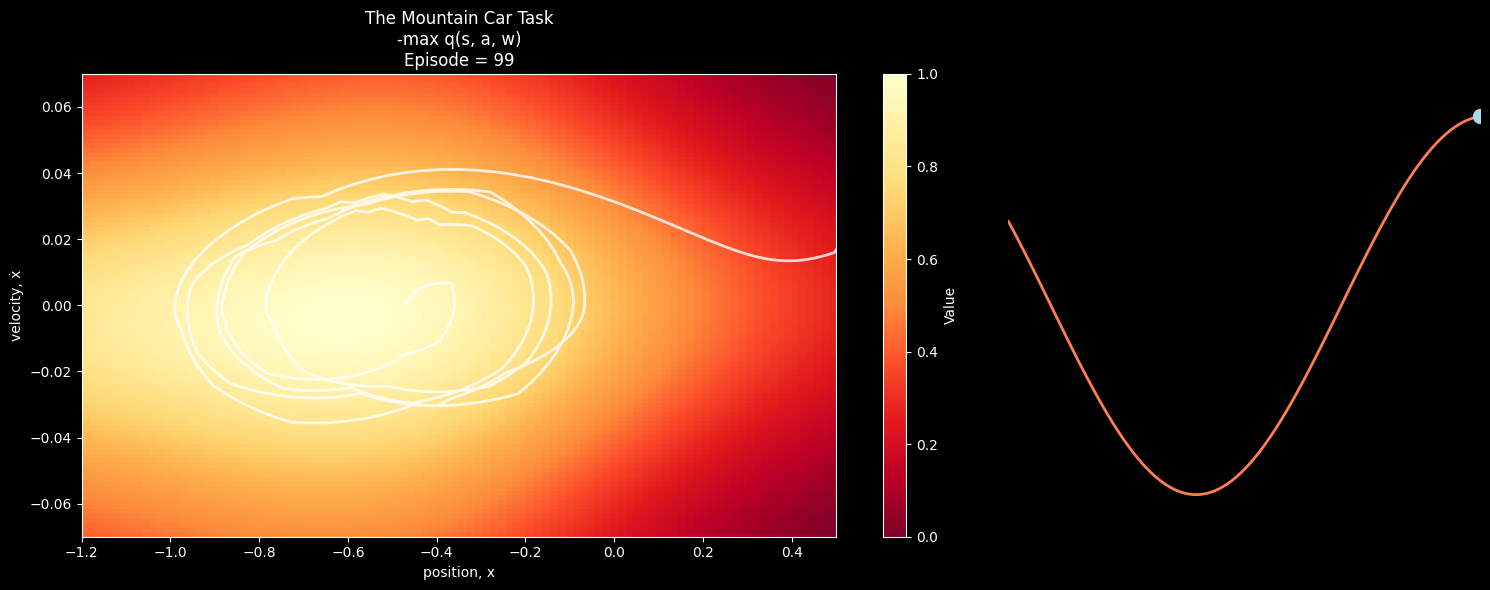

In [5]:
# Example usage
if __name__ == "__main__":
    # Run with specifications matching the image
    car = run_and_visualize_enhanced(
        alpha=0.1,
        distance_scaler=0.25,
        n_steps=4,
        episodes=100 # Match the episode count in the image
    )

